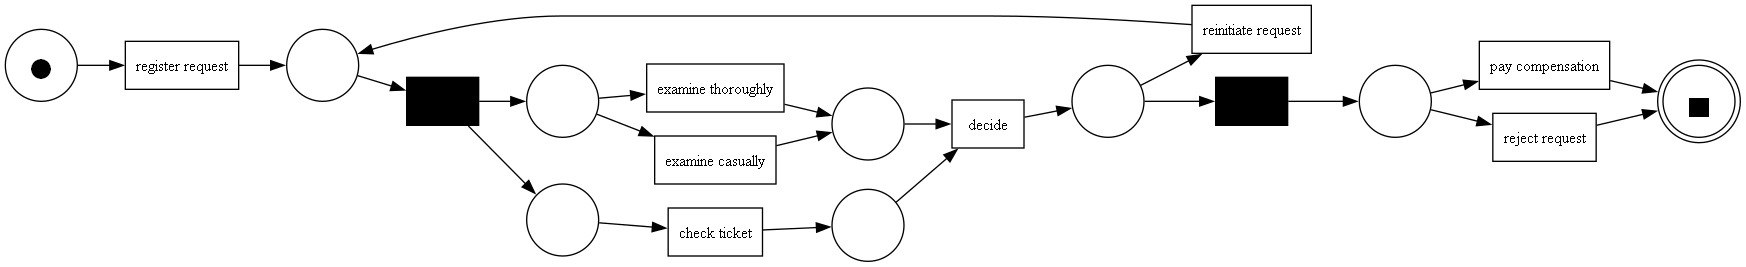

Petri net saved to discovered_petri_net.pnml


In [2]:
import pandas as pd
import pm4py as pm
import os
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter

# os.listdir()

data = pd.read_csv('running-example.csv', sep = ';')

df = pm.format_dataframe(data, case_id= 'case_id', activity_key= 'activity', timestamp_key= 'timestamp')
pn, im, fm = pm.discover_petri_net_inductive(df)
pm.view_petri_net(pn, im, fm)

pnml_exporter.apply(pn, im, "discovered_petri_net.pnml", final_marking=fm)
print("Petri net saved to discovered_petri_net.pnml")

In [3]:
pn

places: [ p_10, p_11, p_4, p_5, p_6, p_8, p_9, sink, source ]
transitions: [ (04d06454-32ce-4461-8ab8-fce6bd79f4b3, 'reject request'), (7daf5baa-c351-4809-9def-af31f784693e, 'register request'), (801520ac-aa60-4e5c-93c1-d4e4f8b780a2, 'decide'), (802f066f-4047-46cc-b933-3b25a128f204, 'check ticket'), (828b2c4f-9f15-4025-9cb5-f71943d72be8, 'pay compensation'), (bcca5cf6-a00f-4064-b045-e3d72a021ee8, 'reinitiate request'), (dcfb4fa9-f640-4222-b038-0899bb1ea216, 'examine casually'), (f82a54c0-bd90-4686-ba0e-c217bce7e849, 'examine thoroughly'), (skip_5, None), (tauSplit_3, None) ]
arcs: [ (04d06454-32ce-4461-8ab8-fce6bd79f4b3, 'reject request')->sink, (7daf5baa-c351-4809-9def-af31f784693e, 'register request')->p_5, (801520ac-aa60-4e5c-93c1-d4e4f8b780a2, 'decide')->p_6, (802f066f-4047-46cc-b933-3b25a128f204, 'check ticket')->p_9, (828b2c4f-9f15-4025-9cb5-f71943d72be8, 'pay compensation')->sink, (bcca5cf6-a00f-4064-b045-e3d72a021ee8, 'reinitiate request')->p_5, (dcfb4fa9-f640-4222-b038-0899bb1

In [4]:
pm.__version__

'2.7.11.9'

*Token-Based Replay*

--- 

In [5]:
pm.fitness_token_based_replay(df, pn, im, fm)

c:\Users\vian8\Desktop\Tugas2\fekdi\fekdi\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 815.88it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [6]:
data_broken = pd.read_csv('running_example_broken.csv', sep = ';')
data_broken

df_problem = pm.format_dataframe(data_broken, case_id= 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'time:timestamp')
pm.fitness_token_based_replay(df_problem, pn, im, fm)

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 476.48it/s]


{'perc_fit_traces': 16.666666666666668,
 'average_trace_fitness': 0.8077731092436974,
 'log_fitness': 0.8156108597285068,
 'percentage_of_fitting_traces': 16.666666666666668}

*Diagnostics and Alignment*

---

(log move, can it be done by the model?)

In [7]:
a = pm.conformance_diagnostics_alignments(df_problem, pn, im, fm)
a

aligning log, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 200.10it/s]


[{'alignment': [('>>', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 22,
  'traversed_arcs': 22,
  'lp_solved': 1,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('>>', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 6,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('>>', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('reinitiate request', '>>'),
   ('>>', None)

source: https://pm4py-source.readthedocs.io/en/stable/_modules/pm4py/objects/petri/align_utils.html#pretty_print_alignments

---

In [8]:
def __print_single_alignment(step_list):
    trace_steps = []
    model_steps = []
    max_label_length = 0
    for step in step_list:
        trace_steps.append(" " + str(step[0]) + " ")
        model_steps.append(" " + str(step[1]) + " ")
        if len(step[0]) > max_label_length:
            max_label_length = len(str(step[0]))
        if len(str(step[1])) > max_label_length:
            max_label_length = len(str(step[1]))
    for i in range(len(trace_steps)):
        if len(str(trace_steps[i])) - 2 < max_label_length:
            step_length = len(str(trace_steps[i])) - 2
            spaces_to_add = max_label_length - step_length
            for j in range(spaces_to_add):
                if j % 2 == 0:
                    trace_steps[i] = trace_steps[i] + " "
                else:
                    trace_steps[i] = " " + trace_steps[i]
        print(trace_steps[i], end='|')
    divider = ""
    length_divider = len(trace_steps) * (max_label_length + 3)
    for i in range(length_divider):
        divider += "-"
    print('\n' + divider)
    for i in range(len(model_steps)):
        if len(model_steps[i]) - 2 < max_label_length:
            step_length = len(model_steps[i]) - 2
            spaces_to_add = max_label_length - step_length
            for j in range(spaces_to_add):
                if j % 2 == 0:
                    model_steps[i] = model_steps[i] + " "
                else:
                    model_steps[i] = " " + model_steps[i]

        print(model_steps[i], end='|')
    print('\n\n')
    
def pretty_print_alignments(alignments):
    """
    Takes an alignment and prints it to the console, e.g.:
     A  | B  | C  | D  |
    --------------------
     A  | B  | C  | >> |
    :param alignment: <class 'list'>
    :return: Nothing
    """
    if isinstance(alignments, list):
        for alignment in alignments:
            __print_single_alignment(alignment["alignment"])
    else:
        __print_single_alignment(alignments["alignment"])

In [9]:
a = pm.conformance_diagnostics_alignments(df_problem, pn, im, fm)

pretty_print_alignments(a)

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 132.40it/s]

         >>         |         >>         | examine thoroughly |    check ticket    |       decide       |         >>         |   reject request   |
---------------------------------------------------------------------------------------------------------------------------------------------------
  register request  |        None        | examine thoroughly |    check ticket    |       decide       |        None        |   reject request   |


 register request |        >>        |   check ticket   | examine casually |        >>        |        >>        | pay compensation |
-------------------------------------------------------------------------------------------------------------------------------------
 register request |       None       |   check ticket   | examine casually |      decide      |       None       | pay compensation |


  register request  |         >>         |         >>         |    check ticket    |       decide       | reinitiate request |         >>         |  p

API FUNCTIONS TEST

---

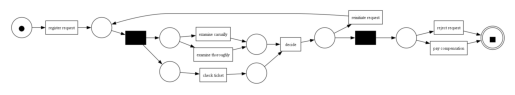

'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n<pnml>\n  <net id="imdf_net_1717225394.5758038" type="http://www.pnml.org/version-2009/grammar/pnmlcoremodel">\n    <name>\n      <text>imdf_net_1717225394.5758038</text>\n    </name>\n    <page id="n0">\n      <place id="p_4">\n        <name>\n          <text>p_4</text>\n        </name>\n      </place>\n      <place id="p_10">\n        <name>\n          <text>p_10</text>\n        </name>\n      </place>\n      <place id="source">\n        <name>\n          <text>source</text>\n        </name>\n        <initialMarking>\n          <text>1</text>\n        </initialMarking>\n      </place>\n      <place id="p_5">\n        <name>\n          <text>p_5</text>\n        </name>\n      </place>\n      <place id="sink">\n        <name>\n          <text>sink</text>\n        </name>\n      </place>\n      <place id="p_6">\n        <name>\n          <text>p_6</text>\n        </name>\n      </place>\n      <place id="p_8">\n        <name>\n          <text

In [18]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import io
from PIL import Image
import matplotlib.pyplot as plt
import tempfile

def draw_petri_csv(file_csv, sep, case_id, activity_key, timestamp_key):

    # check input format
    # if isinstance(file_csv, str): 
    #     df = pd.read_csv(file_csv, sep = sep)
    # else: 
    #     df = file_csv
    df = pd.read_csv(file_csv, sep = sep)
    df = pm.format_dataframe(df, case_id = case_id, activity_key = activity_key, timestamp_key = timestamp_key)
    petri_net, initial_marking, final_marking = pm.discover_petri_net_inductive(df)
    
    # Visualize petri net
    img_petri = pn_visualizer.apply(petri_net, initial_marking, final_marking, parameters= {'format': 'png'})
    
    # PetriNet to PNML handler
    with tempfile.NamedTemporaryFile(suffix='.pnml', delete=False) as temp_file:
        pnml_exporter.apply(petri_net, initial_marking, temp_file.name, final_marking=final_marking)
        temp_file_path = temp_file.name
        
    with open(temp_file_path, 'r') as f:
        pnml_content = f.read()
    
    os.remove(temp_file_path)
    
    # PetriNet to PNG handler
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
        pn_visualizer.save(img_petri, temp_file.name)
        temp_file_path = temp_file.name
        
        # Read the image from the temporary file into a BytesIO object
    with open(temp_file_path, 'rb') as f:
        img_stream = io.BytesIO(f.read())
    img_stream.seek(0)
    
    os.remove(temp_file_path)
    
    image = Image.open(img_stream)
    return pnml_content, image, petri_net, initial_marking, final_marking

# file = pd.read_csv('running-example.csv', sep=';')

pnml, image, pn, im, fm = draw_petri_csv('running-example.csv', ';', 'case_id', 'activity', 'timestamp')
plt.imshow(image)
plt.axis('off')
plt.show()

pnml


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1237.26it/s]


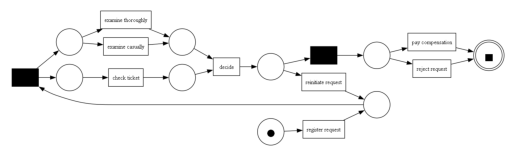

'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n<pnml>\n  <net id="imdf_net_1717224936.034053" type="http://www.pnml.org/version-2009/grammar/pnmlcoremodel">\n    <name>\n      <text>imdf_net_1717224936.034053</text>\n    </name>\n    <page id="n0">\n      <place id="source">\n        <name>\n          <text>source</text>\n        </name>\n        <initialMarking>\n          <text>1</text>\n        </initialMarking>\n      </place>\n      <place id="sink">\n        <name>\n          <text>sink</text>\n        </name>\n      </place>\n      <place id="p_5">\n        <name>\n          <text>p_5</text>\n        </name>\n      </place>\n      <place id="p_4">\n        <name>\n          <text>p_4</text>\n        </name>\n      </place>\n      <place id="p_8">\n        <name>\n          <text>p_8</text>\n        </name>\n      </place>\n      <place id="p_11">\n        <name>\n          <text>p_11</text>\n        </name>\n      </place>\n      <place id="p_6">\n        <name>\n          <text>p

In [11]:
from pm4py.objects.log.importer.xes import importer as xes_importer

def draw_petri_xes(file_xes):
    
    df = xes_importer.apply(file_xes)

    petri_net, initial_marking, final_marking = pm.discover_petri_net_inductive(df)
    # petri_net, initial_marking, final_marking = inductive_miner.apply(df)
    
    # Visualize petri net
    img_petri = pn_visualizer.apply(petri_net, initial_marking, final_marking, parameters= {'format': 'png'})
    
    # PetriNet to PNML handler
    with tempfile.NamedTemporaryFile(suffix='.pnml', delete=False) as temp_file:
        pnml_exporter.apply(petri_net, initial_marking, temp_file.name, final_marking=final_marking)
        temp_file_path = temp_file.name
        
    with open(temp_file_path, 'r') as f:
        pnml_content = f.read()
    
    os.remove(temp_file_path)
    
    # PetriNet to PNG handler
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
        pn_visualizer.save(img_petri, temp_file.name)
        temp_file_path = temp_file.name
        
        # Read the image from the temporary file into a BytesIO object
    with open(temp_file_path, 'rb') as f:
        img_stream = io.BytesIO(f.read())
    img_stream.seek(0)
    
    os.remove(temp_file_path)
    
    image = Image.open(img_stream)
    
    return pnml_content, image, petri_net, initial_marking, final_marking

file_xes = 'running-example.xes'
pnml, image, pn, im, fm = draw_petri_xes(file_xes)
plt.imshow(image)
plt.axis('off')
plt.show()

pnml

In [12]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

def token_based_replay_csv(file_csv, sep, case_id, activity_key, timestamp_key, petri):
    
    if isinstance(file_csv, str):
        df = pd.read_csv(file_csv, sep = sep)
    else: 
        df = file_csv
    
    pn, im, fm = pnml_importer.apply(petri)
    df = pm.format_dataframe(df, case_id = case_id, activity_key = activity_key, timestamp_key = timestamp_key)
    a = pm.fitness_token_based_replay(df, pn, im, fm)
    
    return a 

data_test = pd.read_csv('running_example_broken.csv', sep = ';')
pnml_path = 'discovered_petri_net.pnml'

x = token_based_replay_csv('running_example_broken.csv', ';', 'case:concept:name', 'concept:name', 'time:timestamp', pnml_path)
x

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1026.92it/s]


{'perc_fit_traces': 16.666666666666668,
 'average_trace_fitness': 0.8077731092436974,
 'log_fitness': 0.8156108597285068,
 'percentage_of_fitting_traces': 16.666666666666668}

In [13]:
def token_based_replay_xes(file_xes, petri):
    
    df = xes_importer.apply(file_xes)
    pn, im, fm = pnml_importer.apply(petri)
    a = pm.fitness_token_based_replay(df, pn, im, fm)
    
    return a 

y = token_based_replay_xes(file_xes, pnml_path)
y

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1156.94it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [14]:
def diagnostics_alignments_xes(file_xes, petri):
    df = xes_importer.apply(file_xes)
    pn, im, fm = pnml_importer.apply(petri)
    a = pm.conformance_diagnostics_alignments(df, pn, im, fm)
    
    return a 

a2 = diagnostics_alignments_xes(file_xes, pnml_path)
a2

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 137.23it/s]


[{'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('decide', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 24,
  'traversed_arcs': 24,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine casually', 'examine casually'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('reinitiate request', 'reinitiate request'),
   ('

In [15]:
def diagnostics_alignments_csv(event_log, sep, case_id, activity_key, timestamp_key, petri):

    if isinstance(event_log, str):
        df = pd.read_csv(event_log, sep = sep)
    else: 
        df = event_log
        
    pn, im, fm = pnml_importer.apply(petri)
    df = pm.format_dataframe(df, case_id = case_id, activity_key = activity_key, timestamp_key = timestamp_key)
    a = pm.conformance_diagnostics_alignments(df, pn, im, fm)
    
    return a 

alignment = diagnostics_alignments_csv(df_problem, '', 'case:concept:name', 'concept:name', 'time:timestamp', pnml_path)
alignment

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 189.64it/s]


[{'alignment': [('>>', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 22,
  'traversed_arcs': 22,
  'lp_solved': 1,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('>>', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 6,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('>>', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('reinitiate request', '>>'),
   ('>>', None)